In [3]:
x <- read.csv('seeds.csv')
x <- x[1:2]
head(x)

X15.26,X14.84
14.88,14.57
14.29,14.09
13.84,13.94
16.14,14.99
14.38,14.21
14.69,14.49


In [2]:
# Create the k-means model: km.out
km.out <- kmeans(x, centers = 3, nstart = 20)

# Inspect the result
summary(km.out)

             Length Class  Mode   
cluster      209    -none- numeric
centers        6    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [5]:
# Print the km.out object
print(km.out)

K-means clustering with 3 clusters of sizes 55, 67, 87

Cluster means:
    X15.26   X14.84
1 18.92945 16.38127
2 15.13925 14.68896
3 12.03759 13.30437

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 3 3 2 3 3 2 2 2 2 2 2 2
 [38] 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 3 1 2 1 1 2
 [75] 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Within cluster sum of squares by cluster:
[1] 57.27229 74.22449 64.41013
 (between_SS / total_SS =  90.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


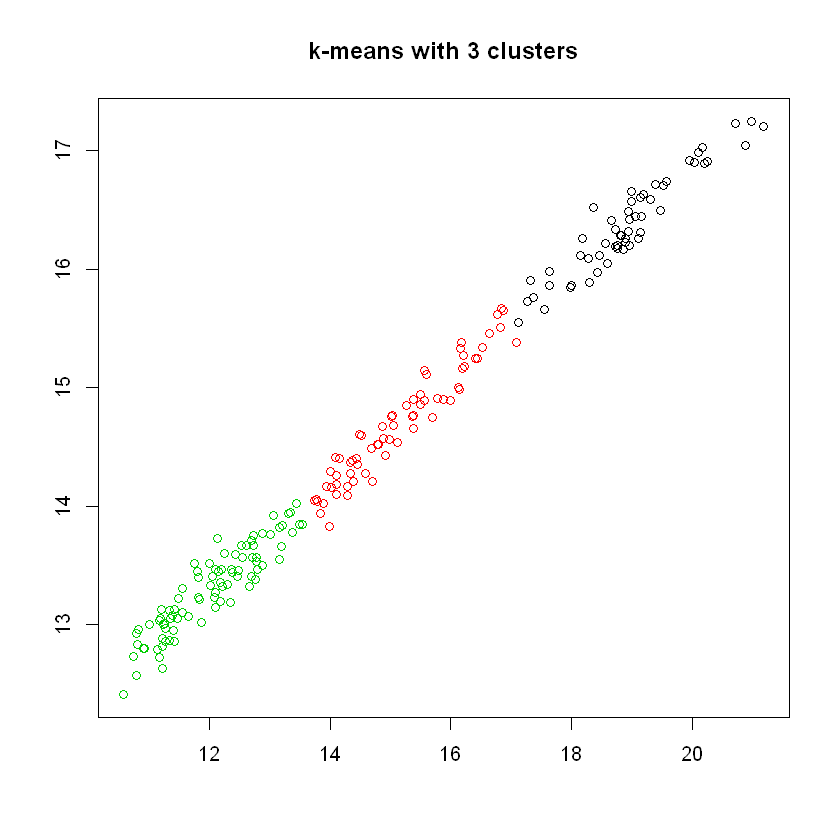

In [6]:
# Scatter plot of x
plot(x, col = km.out$cluster,
     main = "k-means with 3 clusters",
     xlab = "",
     ylab = "")

## HOW K-MEANS WORK

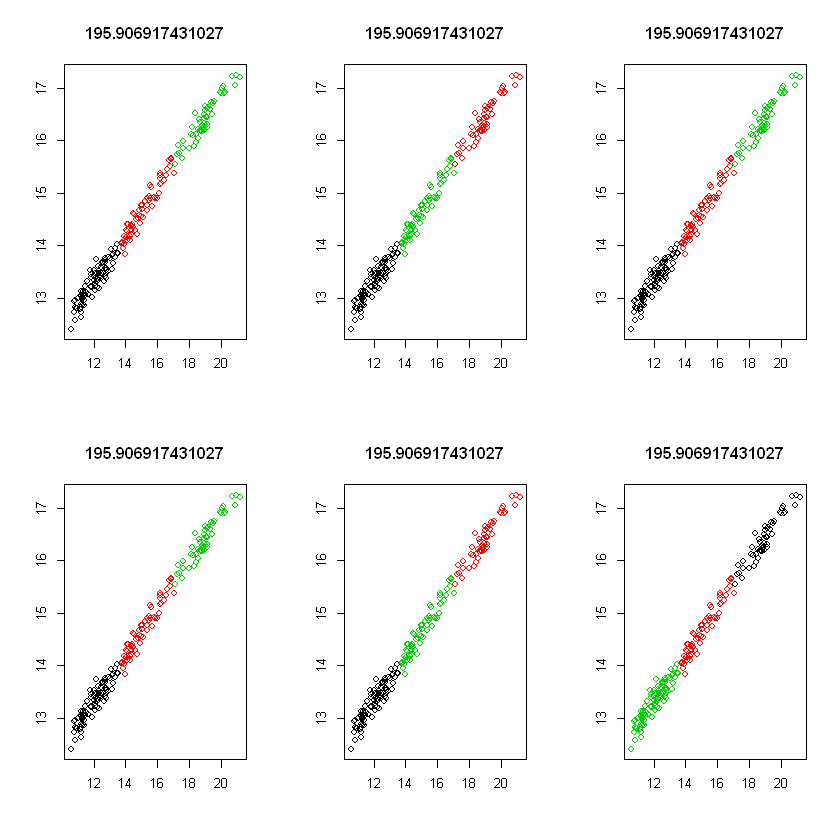

In [7]:
# Set up 2 x 3 plotting grid
par(mfrow = c(2, 3))

# Set seed
set.seed(1)

for(i in 1:6) {
  # Run kmeans() on x with three clusters and one start
  km.out <- kmeans(x, centers = 3, nstart = 1)
  
  # Plot clusters
  plot(x, col = km.out$cluster, 
       main = km.out$tot.withinss, 
       xlab = "", ylab = "")
}

## SELECT NUMBER OF CLUSTERS

In [8]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 15 cluster centers
for (i in 1:15) {
  km.out <- kmeans(x, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

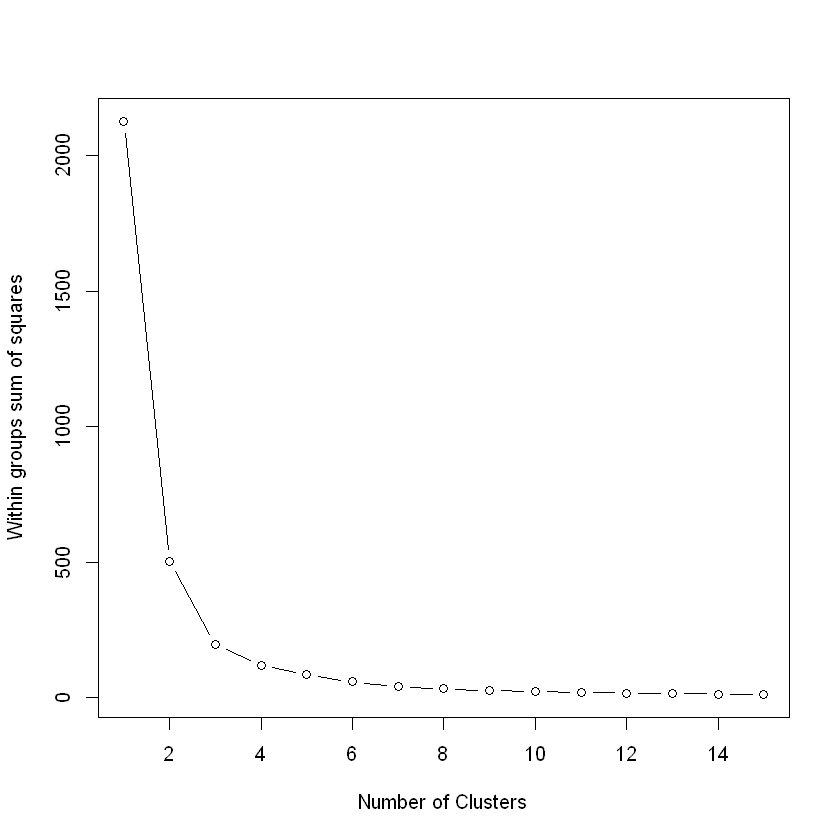

In [9]:
# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

In [10]:
# Set k equal to the number of clusters corresponding to the elbow location
k <- 3